# TP 2 Introduction aux modèles génératifs


### 1 Exercice 1 : Classification de texte avec un modèle Naive Bayes

In [1]:
import numpy as np
import math as m
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#### 1.1 Les données

In [2]:
from load_ag_news import load_ag_news
path = "C:/Users/antoi/Documents/Telecom Paris/Cours/IA702 Probabilistic model/TP2/TP2_functions/"
train_set, test_set = load_ag_news(path)

In [3]:
train_set = np.array(train_set)
test_set = np.array(test_set)

#### 1.2 Développer un Naive Bayes !

In [4]:
def esti_para(train_set):
    unique, counts = np.unique(train_set[:, 0], return_counts=True)
    classes = unique
    B = []
    for u in unique:
        B.append((u, {}))
    
    pi = counts/len(train_set[:, 0])
    
    number0 = 0
    number1 = 0
    number2 = 0
    number3 = 0
    for t in train_set :
        if t[0] == B[0][0]:
            for i in t[1]:
                number0 += 1
        if t[0] == B[1][0]:
            for i in t[1]:
                number1 += 1
        if t[0] == B[2][0]:
            for i in t[1]:
                number2 += 1
        if t[0] == B[3][0]:
            for i in t[1]:
                number3 += 1

    for t in train_set :
        if t[0] == B[0][0]:
            for i in t[1]:
                if i in B[0][1]:
                    B[0][1][i] += 1/number0
                else :
                    B[0][1][i] = 1/number0
        if t[0] == B[1][0]:
            for i in t[1]:
                if i in B[1][1]:
                    B[1][1][i] += 1/number1
                else :
                    B[1][1][i] = 1/number1
        if t[0] == B[2][0]:
            for i in t[1]:
                if i in B[2][1]:
                    B[2][1][i] += 1/number2
                else :
                    B[2][1][i] = 1/number2
        if t[0] == B[3][0]:
            for i in t[1]:
                if i in B[3][1]:
                    B[3][1][i] += 1/number3
                else :
                    B[3][1][i] = 1/number3
    return classes, pi, B

In [5]:
classes, pi, B = esti_para(train_set)

In [6]:
print(classes)

[0 1 2 3]


In [7]:
print(pi)

[0.25 0.25 0.25 0.25]


In [8]:
print(B[0][1]['London'])
print(B[1][1]['London'])
print(B[2][1]['London'])
print(B[3][1]['London'])

0.00020850882196292995
0.00018036294574312625
0.00014763636417864572
0.00011897389590699329


In [9]:
def naive_bayes(phrase, epsi, classes, pi, B):
    bayes_coeff = []
    for c in classes :
        coeff = pi[c]
        for mot in phrase :
            if mot in B[c][1]:
                coeff = coeff * (B[c][1][mot] + epsi)
            else :
                coeff = coeff * epsi    
        bayes_coeff.append(coeff)
    bayes_coeff = bayes_coeff / sum(bayes_coeff)
    return bayes_coeff

In [10]:
phrase_test = naive_bayes(["Arsenal", "is", "a", "londonian", "team", "."], 0.00001, classes, pi, B)

In [11]:
phrase_test

array([2.82781708e-03, 9.92498973e-01, 7.44819529e-04, 3.92839080e-03])

In [12]:
def naive_bayes_log(phrase, epsi, classes, pi, B):
    bayes_coeff = []
    for c in classes :
        coeff = m.log(pi[c])
        for mot in phrase :
            if mot in B[c][1]:
                coeff = coeff  + m.log( (B[c][1][mot] + epsi))
            else :
                coeff = coeff + m.log( epsi)    
        bayes_coeff.append(coeff)
    return bayes_coeff

In [13]:
def test_my_bayes(test_set, epsi, classes, pi, B):
    classif = []
    for test in test_set :
        proba = naive_bayes_log(test[1], epsi, classes, pi, B)
        index_max = np.argmax(proba)
        if index_max == test[0]:
            classif.append(1)
        else : 
            classif.append(0)
    error = sum(classif)/len(classif)
    return error

In [14]:
test_my_bayes(test_set, 10**(-10), classes, pi, B)

0.9010526315789473

In [15]:
test_my_bayes(test_set, 10**(-5), classes, pi, B)

0.8940789473684211

In [16]:
test_my_bayes(test_set, 1, classes, pi, B)

0.4909210526315789

### Exercice 2 : Étiquetage morpho-syntaxique avec une chaîne de Markov cachée

#### 2.1 Introduction

In [17]:
from load_conll2000 import load_conll2000

path = "C:/Users/antoi/Documents/Telecom Paris/Cours/IA702 Probabilistic model/TP2/TP2_functions/"
train_set, test_set = load_conll2000(path)

#### 2.2 Développer une chaîne de Markov cachée !

In [18]:
def esti_para_markov(train_set):
    classes = []
    words = []
    number = 0
    for t in train_set: 
        for i in t :
            number += 1
            if not(i[0] in classes):
                classes.append(i[0])
            if not(i[1] in words):
                words.append(i[1])
    
    b = {}
    l=np.zeros(len(words))
    for c in classes :
        b[c] = np.copy(l)
    pi = {}
    for t in train_set: 
        for i in t :
            if i[0] in pi :
                pi[i[0]] += 1/number
            else :
                pi[i[0]] = 1/number
            b[i[0]][words.index(i[1])] += 1
    for clas in b.keys():
        somme = np.sum(b[clas])
        b[clas] = b[clas] / somme
                
    a = {}
    k=np.zeros(len(classes))
    for c in classes :
        a[c] = np.copy(k)
    j=0
    for t in train_set:
        prev = 0
        for i in t :
            j+=1
            if prev != 0:
                a[prev][classes.index(i[0])] += 1
            prev = i[0]
    for clas in a.keys():
        somme = np.sum(a[clas])
        a[clas] = a[clas] / somme
        
    
    return classes, words, pi, a , b

In [19]:
classes, words, pi, a , b = esti_para_markov(train_set)

In [20]:
pi['ADJ']

0.06759648037330576

In [21]:
a['NUM'][classes.index('NOUN')]

0.34821321140656963

In [22]:
a['NUM'][classes.index('PUNCT')]

0.1951630369389965

In [23]:
b["PUNCT"][words.index(".")]

0.36019485612847296

In [24]:
def forward_backward(phrase, epsi, classes, words, pi, a, b):
    alpha = [[]]
    i = 0
    for mot in phrase:
        if i == 0:
            for c in classes:
                try:
                    alpha[0].append(pi[c] * (b[c][words.index(mot)] + epsi))
                except:
                    alpha[0].append(pi[c] * epsi)
        else : 
            alpha.append([])
            j = 0
            for c in classes:
                coeff = 0
                k=0
                for c_bis in classes:
                    coeff += alpha[i-1][k]*a[c_bis][classes.index(c)]
                    k+=1
                try:
                    alpha[i].append((b[c][words.index(mot)] + epsi)* coeff )
                except:
                    alpha[i].append(epsi* coeff)
        prev_word = mot
        i += 1

    phrase_copy_reverse = phrase.copy()
    phrase_copy_reverse.reverse()
    beta = [[]]
    for iteration in range(len(classes)):
        beta[0].append(1)
    i=1
    for mot in phrase_copy_reverse:
        beta.append([])
        j = 0
        for c in classes:
            coeff = 0
            k=0
            for c_bis in classes:
                try:
                    coeff += beta[i-1][k]*a[c][classes.index(c_bis)]*(b[c_bis][words.index(prev_word)] + epsi)
                except:
                    coeff += beta[i-1][k]*a[c][classes.index(c_bis)]*(epsi)
                k+=1
                #beta[i].append((b[c][words.index(mot)] + epsi) * coeff )
            beta[i].append(coeff)
        prev_word = mot
        i += 1
        if i == len(phrase_copy_reverse):
            break
    beta.reverse()
    
    alpha = np.array(alpha)
    beta = np.array(beta)
    predict = []
    for itera in range(len(phrase)):
        index = np.argmax(alpha[itera] * beta[itera])
        predict.append(classes[index])
    
    return predict

In [25]:
predict= forward_backward(["I", "am", "a", "student", "in", "a", "French","school", "."],10**(-5), classes, words, pi, a, b)

predict

['PRON', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT']

In [74]:
def test_my_markov(test_set, epsi, classes, words, pi, a, b):
    classif = []
    i = 1
    for test in test_set :
        phrase = []
        for t in test :
            phrase.append(t[1])
        
        predict = forward_backward(phrase, epsi, classes, words, pi, a, b)

        k=0
        for t in test:
            if predict[k] == t[0]:
                classif.append(1)
            else : 
                classif.append(0)
            k+=1
        i += 1
    accuracy = sum(classif)/len(classif)
    return accuracy

In [75]:
accuracy = test_my_markov(test_set, 10**(-5), classes, words, pi, a, b)
accuracy

0.9061992105874158

Je n'ai pas relancé l'accuracy sur le test set apres ma verification du code, elle prend beaucoup trop de temps à s'executer, surtout sur mon vieil oridnateur. J'ai placé quelques test sur les variable que vous avez envoyé par mail pour démontrer que mon code (a l'air) bon.

### Exercice 3 : Filtrage de Kalman

In [26]:
import numpy as np
path = "C:/Users/antoi/Documents/Telecom Paris/Cours/IA702 Probabilistic model/TP2/TP2_functions/"
X = np.loadtxt(path + "signal_X.txt")
Y = np.loadtxt(path + "signal_Y.txt")

In [27]:
def esti_param_kalman(Y):
    cov1 = 0
    prev_y = Y[0]
    len1 =[]
    for y in Y[1:]:
        cov1 += prev_y * y
        prev_y = y
    cov1 /= (len(Y) - 2)

    cov2 = 0
    prev_y = Y[0]
    for k in range(len(Y[1:]) - 2):
        cov2 += prev_y * Y[k + 2]
        prev_y = Y[k + 1]
    cov2 /= (len(Y) - 2)

    a = cov2 / cov1
    b = cov1 / (cov2)**(1/2)
    return a,b

In [28]:
a, b = esti_param_kalman(Y)
a, b 

(0.5967340169136152, 0.8860483947957409)

In [29]:
def kalman_filter(Y, a, b, T):
    y_t1 = Y[0]
    x_tt = b * y_t1
    sigma_tt = 1 - b**2
    X_tt = [x_tt]
    for k in range(T-1):
        #pred
        y_t1 = Y[k+1]
        x_t1t = a * x_tt
        sigma_t1t = 1 - a**2 + a**2 * sigma_tt
        #maj
        ytilde = y_t1 - b * x_t1t
        S = b**2 * sigma_t1t + 1 - b**2
        K = (b/S) * sigma_t1t
        x_t1t1 = x_t1t + K * ytilde
        sigma_t1t1 = (1 - b*K) * sigma_t1t
        
        x_tt = x_t1t1
        sigma_tt = sigma_t1t1
        
        X_tt.append(x_tt)
    return X_tt

In [30]:
def MSE(X, Y):
    mse = 0
    for k in range(len(X)):
        mse += (X[k] - Y[k])**2
    mse /= len(X)
    return mse

In [31]:
X_tt = kalman_filter(Y, a, b, len(Y))
len(X_tt)

10000

In [32]:
MSE(X_tt,X)

0.17449593253019177

In [33]:
MSE(X,Y)

0.20225719834189304

Le filtre de Kalmann a donc bien corrigé le signal, l'erreur quadratique moyenne est plus faible que sans ce dernier !

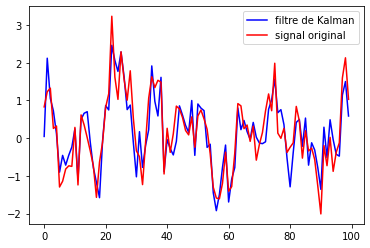

In [35]:
plt.plot(X_tt[:100], color = 'b', label = 'filtre de Kalman')
plt.plot(X[:100], color = 'r', label = 'signal original')
plt.legend()